In [1]:
import gvar as gv
import numpy as np
import scipy.optimize as so

import matplotlib.pyplot as plt
import matplotlib as mpl
import view_gluon

import scipy.interpolate as si

import utils

utils.set_mplstyle()

renorm_mu = -10

escale = 1.7606

XI_R = view_gluon.__XI_R__
XI_0 = view_gluon.__XI_0__

In [2]:
def bin_data(x,y,bins):
    
    binned_y = []
    binned_x = []
    
    for pos in range(len(bins)):
        if bins[pos] == bins[-1]:
            continue
            
        bin_mask = np.logical_and(x >= bins[pos], x < bins[pos+1])
        if sum(bin_mask) == 0:
            continue
        else:
            binned_y.append(np.mean(y[bin_mask]))
            binned_x.append((bins[pos+1] + bins[pos])/2)
                        
    return np.asarray(binned_x), np.asarray(binned_y)

def chisquare(y_data,y_obs,y_err,ddof=1):
    """Calculate the chi-square statistic of the fit"""
    
    return np.sum((y_data-y_obs)**2/(y_err**2))/ddof

In [3]:
results = {}

for Nt in [16,24,32,36,64,128]: 
    prop = view_gluon.propagator(Nt,n_samples='all',gtype="landau")
    print(Nt, len(prop.prop_info))
    q = prop.q
    D = prop.D
    #_,_ = prop.half_cut()
    
    # Correct for anisotropy
    prop.D = prop.D+prop.D4*(XI_0**2-1)
    
    # Cone cut
    qc, Dc = prop.cone_cut(radius=1)
    
    # Lattice momentum correction
    qi = prop.correct_q(prop.q,qtype="improved")
    
    # Renormalize
    #prop.renormalize()
    
    results[Nt] = {'D': prop.D.copy(),'q':prop.q, 'Nconf':len(prop.prop_info),'qi':qi}

16 254
24 32
32 99
36 59
64 33
128 43


In [4]:
for Nt in results.keys():
    print(Nt,max(results[Nt]['q'][:,0]))

16 7.0
24 11.0
32 15.0
36 16.0
64 16.0
128 16.0


254
32
99
59
33
43


Text(0.5, 0, '$q$ (GeV)')

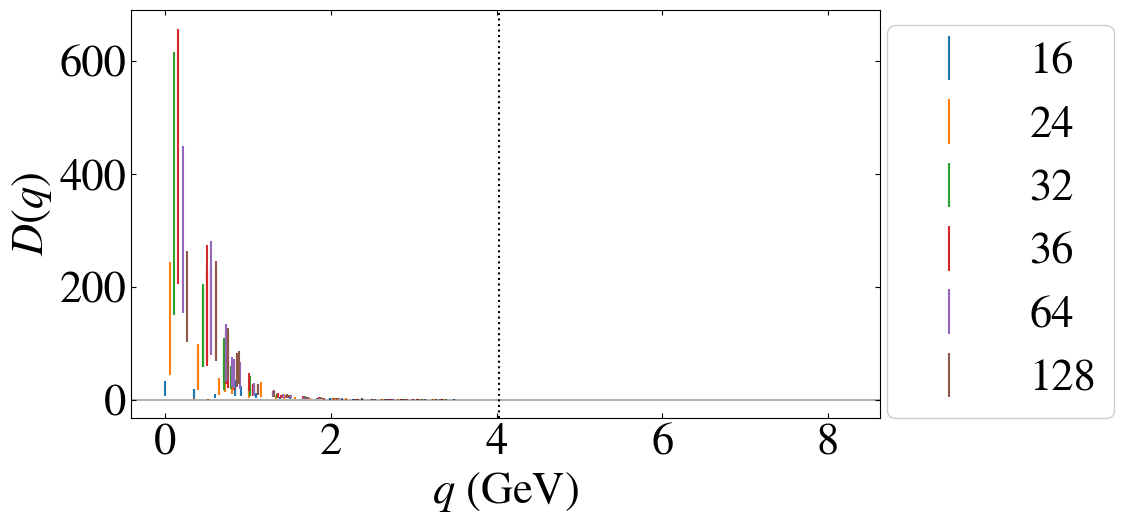

In [16]:
plt.figure(figsize=(12,6))
for pos,Nt in enumerate(results.keys()):
    print(results[Nt]['Nconf'])
    q = results[Nt]['qi'].copy()
    q = np.asarray([np.linalg.norm(q_) for q_ in q])
    D = results[Nt]['D'].copy()
    
    mu = q[renorm_mu]
    
    Z = 1/(D[renorm_mu]*mu**2)
    
    D *= Z
    plt.errorbar(utils.to_gev(q+0.03*pos,scale=escale,shift=0),np.asarray([d.mean for d in D]),[d.sdev for d in D],label=Nt,ls='')
    
ax = plt.gca()
ax.axvline(mu,0,1,ls=':',c='k')
ax.axhline(1/(2*mu),0,1,c='k',alpha=0.3)
    
plt.legend(loc=(1.01,0))
plt.ylabel('$D(q)$')
plt.xlabel('$q$ (GeV)')
#plt.yscale('log')

16 0.124(52)
128 0.137(38)


Text(0.5, 0, '$q$')

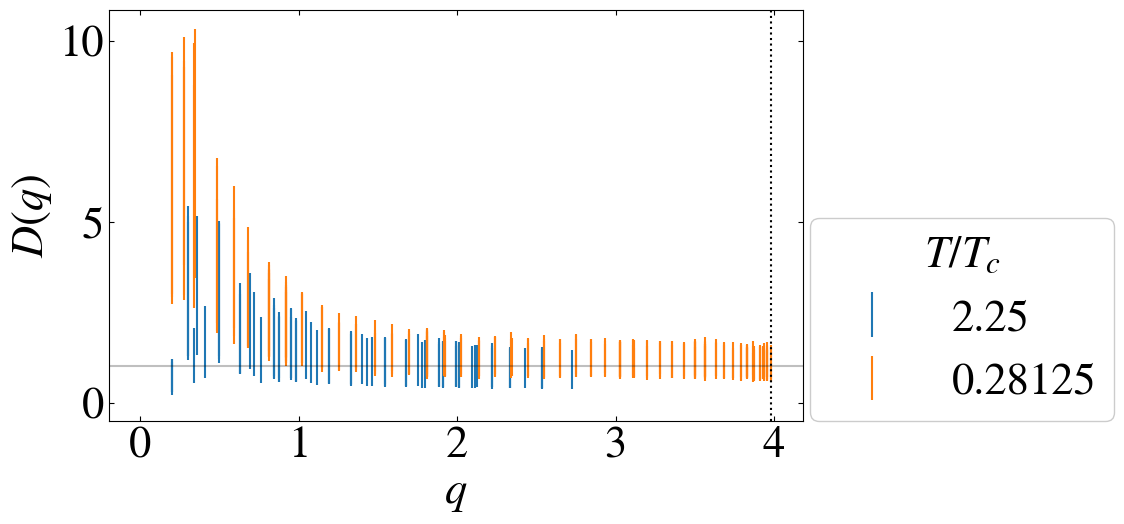

In [17]:
plt.figure(figsize=(12,6))
for pos, Nt in enumerate([16,128]):
    q = results[Nt]['qi'].copy()
    q = np.asarray([np.linalg.norm(q_*np.asarray([1/XI_R,1,1,1])) for q_ in q])
    D = results[Nt]['D'].copy()
    
    mu = q[renorm_mu]
    
    Z = 1/(D[renorm_mu]*mu**2)
    print(Nt, Z)
    
    D *= Z
    
    plt.errorbar(q,q**2*np.asarray([d.mean for d in D]),q**2*np.asarray([d.sdev for d in D]),label=36/Nt,ls='')
    
ax = plt.gca()
ax.axvline(mu,0,1,ls=':',c='k')
ax.axhline(1,0,1,c='k',alpha=0.25)
    
plt.legend(loc=(1.01,0),title='$T/T_c$')
plt.ylabel('$D(q)$')
plt.xlabel('$q$')

# Test binning

16 0.124(52)
[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.   1.02 1.04 1.06 1.08 1.1
 1.12 1.14 1.16 1.18 1.2  1.22 1.24 1.26 1.28 1.3  1.32 1.34 1.36 1.38
 1.4  1.42 1.44 1.46 1.48 1.5  1.52 1.54 1.56 1.58 1.6  1.62 1.64 1.66
 1.68 1.7  1.72 1.74 1.76 1.78 1.8  1.82 1.84 1.86 1.88 1.9  1.92 1.94
 1.96 1.98 2.   2.02 2.04 2.06 2.08 2.1  2.12 2.14 2.16 2.18 2.2  2.22
 2.24 2.26 2.28 2.3  2.32 2.34 2.36 2.38 2.4  2.42 2.44 2.46 2.48 2.5
 2.52 2.54 2.56 2.58 2.6  2.62 2.64 2.66 2.68 2.7  2.72 2.74 2.76 2.78
 2.8  2.82 2.84 2.86 2.88 2.9  2.92 2.94 2.96 2.98 3.   3.02 3.04 3.06
 3.08 3.1  3.12 3.14 3.16 3.18 3.2  3.22 3.24 3.26 3.28 3.3  3.32 3.34
 3.36 3.38 3.4  3.42 3.44 3.46 3.48 3.5  3.52 3.54 3.56 3.58 3.6  3.62
 3.64 3.66 3.68 3.7  3.72 3.74 3.76 3.78 3.8  3.82 3.84 3.86 3.88 

Text(0.5, 0, '$q$')

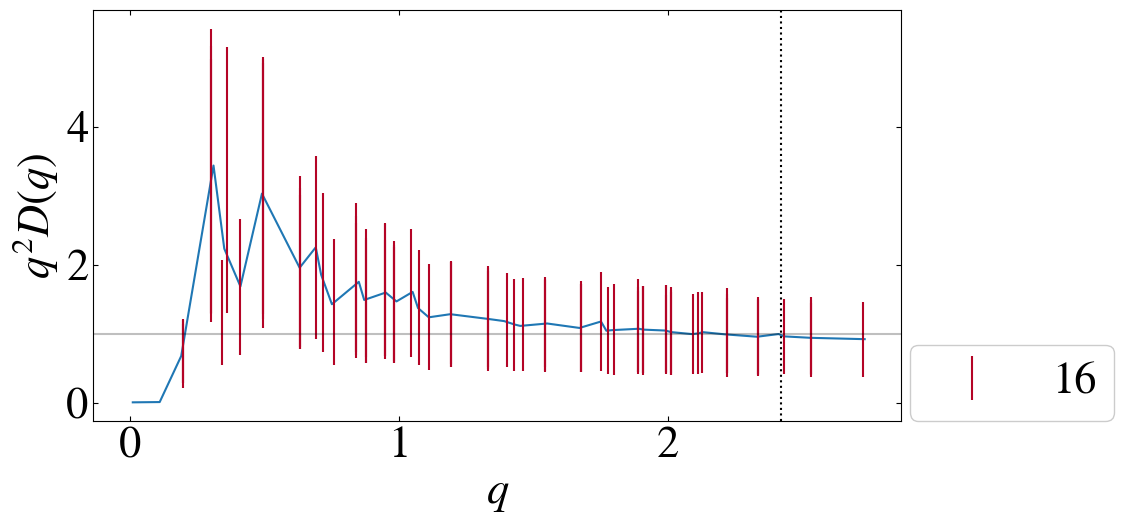

In [7]:
cmap = mpl.cm.coolwarm_r
norm = mpl.colors.Normalize(vmin=24,vmax=70)

plt.figure(figsize=(12,6))
for pos, Nt in enumerate([16]):
    q = results[Nt]['qi'].copy()
    q = np.asarray([np.linalg.norm(q_*np.asarray([1/XI_R,1,1,1])) for q_ in q])
    D = results[Nt]['D'].copy()
    
    mu = q[renorm_mu]
    
    Z = 1/(D[renorm_mu]*mu**2)
    print(Nt, Z)
    
    D *= Z
    
    bins = np.arange(0,5,0.02)
    print(bins)
    y = np.asarray([d.mean for d in D])
    y_err = np.asarray([d.sdev for d in D])
    
    x_binned, y_binned = bin_data(q,D,bins)
    
    plt.plot(x_binned,x_binned**2*np.asarray([yb.mean for yb in y_binned]))
    
    
    
    plt.errorbar(q+0.06*pos,q**2*np.asarray([d.mean for d in D]),q**2*np.asarray([d.sdev for d in D]),label=Nt,ls='',c=cmap(norm(Nt)))
    
ax = plt.gca()
ax.axvline(mu,0,1,ls=':',c='k')
ax.axhline(1,0,1,c='k',alpha=0.25)
    
plt.legend(loc=(1.01,0))
plt.ylabel('$q^2D(q)$')
plt.xlabel('$q$')

## $q_{max}$ fitting

In [8]:
def simple_mass(q,M,Z):
    return Z/np.sqrt(q**2 + M**2)

/tmp/ipykernel_3711094/1424300856.py:40: RuntimeWarning: invalid value encountered in sqrt
  popt = gv.gvar(iso_popt,np.sqrt(np.diag(iso_pcov)))
/tmp/ipykernel_3711094/2641452531.py:22: RuntimeWarning: divide by zero encountered in divide
  return np.sum((y_data-y_obs)**2/(y_err**2))/ddof


Text(0.5, 0, '$q$')

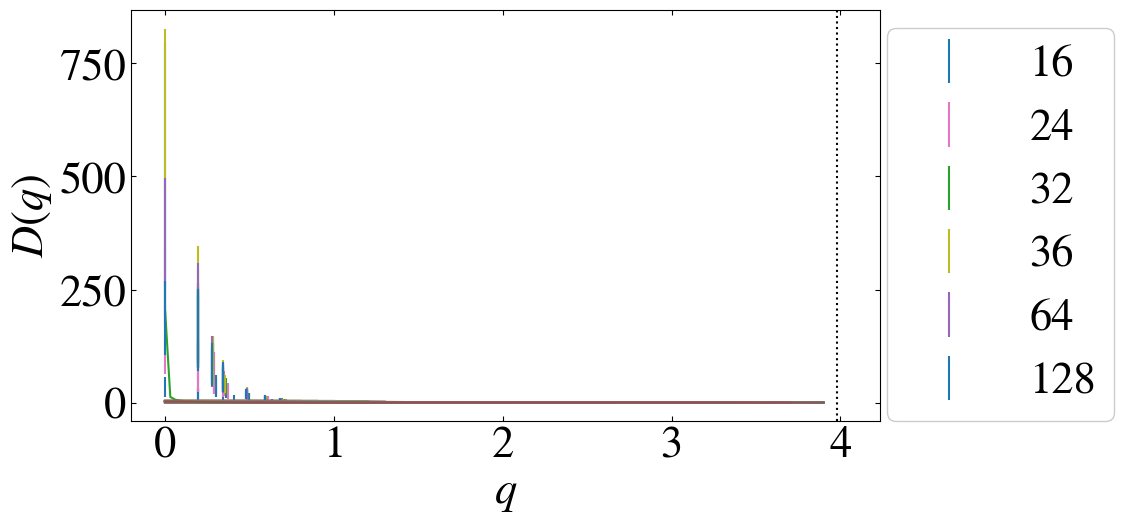

In [19]:
qmax_results = {}

plt.figure(figsize=(12,6))
for pos, Nt in enumerate(results.keys()):
    q = results[Nt]['qi'].copy()
    q = np.asarray([np.linalg.norm(q_*np.asarray([1/XI_R,1,1,1])) for q_ in q])
    D = results[Nt]['D'].copy()
    
    mu = q[renorm_mu]
    
    Z = 1/(D[renorm_mu]*mu**2)
    
    D *= Z
    
    plt.errorbar(q,[d.mean for d in D],[d.sdev for d in D],label=Nt,ls='')
    
    popts = []
    q_maxs = []
    chisq = []
    
    for q_max in np.arange(0.5,4,0.1):
        fit_cut = q < q_max
    
        qc = q[fit_cut]
        Dc = D[fit_cut]
    
        y = np.asarray([d.mean for d in Dc])
        y_err = np.asarray([d.sdev for d in Dc])
    
        try:
            iso_popt,iso_pcov = so.curve_fit(simple_mass,qc,y,sigma=y_err,absolute_sigma=True)    
            iso_chisq = chisquare(y,simple_mass(qc,*iso_popt),y_err,ddof=len(qc)-2)
            #print(iso_chisq)
    
            plot_q = np.linspace(0,q_max,100)
    
            #print(iso_popt)
            plt.plot(plot_q,simple_mass(plot_q,*iso_popt))
            
            popt = gv.gvar(iso_popt,np.sqrt(np.diag(iso_pcov)))
            
            popts.append(popt)
            q_maxs.append(q_max)
            chisq.append(iso_chisq)
            
        except Exception as e:
            print(e)
    qmax_results[Nt] = {'popt':popts,'q_max':q_maxs,'chisq':chisq}
    
plt.legend()
    
ax = plt.gca()
ax.axvline(mu,0,1,ls=':',c='k')
    
plt.legend(loc=(1.01,0))
plt.ylabel('$D(q)$')
plt.xlabel('$q$')

(0.0, 10.0)

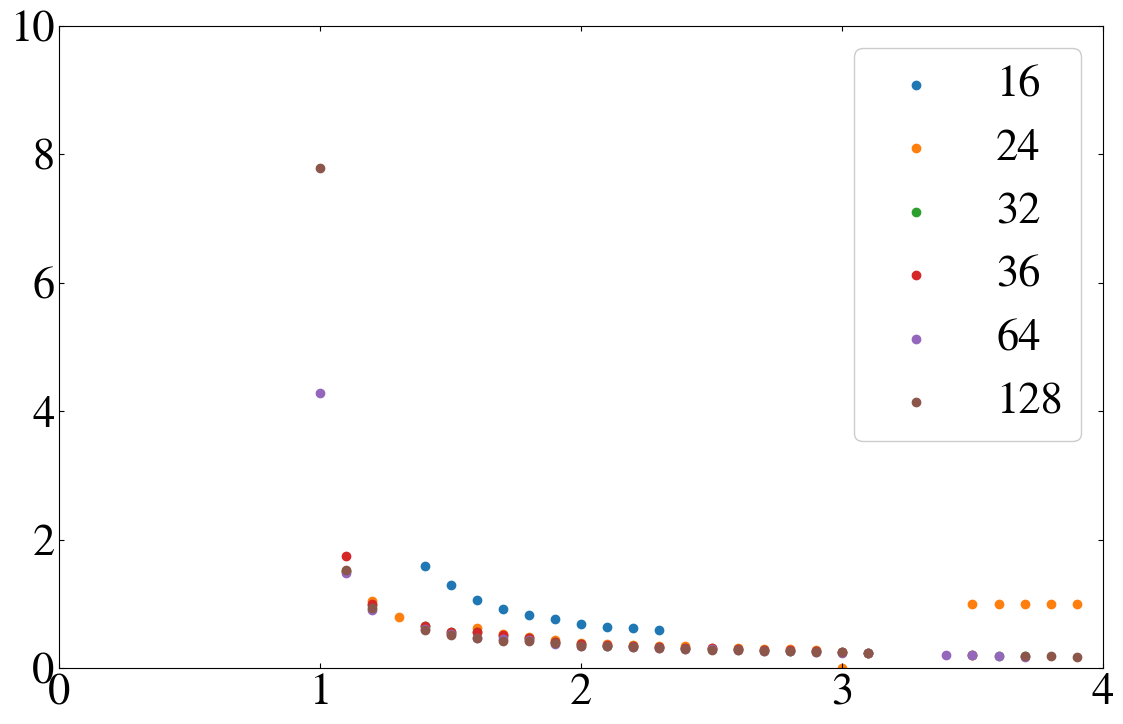

In [22]:
plt.figure(figsize=(12,8))
for Nt in qmax_results.keys():
    popts = qmax_results[Nt]['popt']
    qmax = qmax_results[Nt]['q_max']
    
    plt.scatter(qmax,[p[0].mean for p in popts],label=Nt)
plt.legend()
plt.xlim([0,4])
plt.ylim([0,10])

In [11]:
def iso_gribov(p,M,Z):
    return Z/np.sqrt(p**2 + M**2)

def aniso_gribov(p,M,Z,gamma,alpha):
    return Z/np.sqrt(p**4 + gamma*M**2/p**2 + alpha * M**3*p + M**4)

[0.19634793 0.19634793 0.19634793 0.34008458 0.11371211 0.30005909
 0.30005909 0.30005909 0.35859164 0.49417389 0.49417389 0.49417389
 0.68952707 0.40888355 0.63120955 0.63120955 0.63120955 0.71696957
 0.84047681 0.84047681 0.94802804 0.84047681 0.94802804 0.94802804
 1.04456357 0.75942056 0.87696949 0.87696949 0.98052607 0.87696949
 0.98052607 0.98052607 1.0741449  1.19232584 1.19232584 1.19232584
 1.39905261 1.11143222 1.33078506 1.33078506 1.33078506 1.42788042
 1.5424524  1.5424524  1.5424524  1.74922645 1.45894658 1.67605457
 1.67605457 1.67605457 1.77467625 1.88585172 1.88585172 1.99082838
 1.88585172 1.99082838 1.99082838 2.09054025 1.7977537  1.90758467
 1.90758467 2.0114274  1.90758467 2.0114274  2.0114274  2.11016613
 2.21741304 2.21741304 2.21741304 2.41767649 2.12395086 2.33225347
 2.33225347 2.33225347 2.42971722 2.53201103 2.53201103 2.53201103
 2.72510332]
16 0.124(52)
[0.19634793 0.19634793 0.19634793 0.34008458 0.28224071 0.28224071
 0.28224071 0.34382019 0.48356199 0.

/tmp/ipykernel_3711094/34687636.py:32: RuntimeWarning: invalid value encountered in sqrt
  gv_iso_popt = gv.gvar(iso_popt,np.sqrt(np.diag(iso_pcov)))
/home/ben/anaconda3/envs/gluprop/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/ben/anaconda3/envs/gluprop/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:803: RuntimeWarning: divide by zero encountered in divide
  transform = 1.0 / sigma


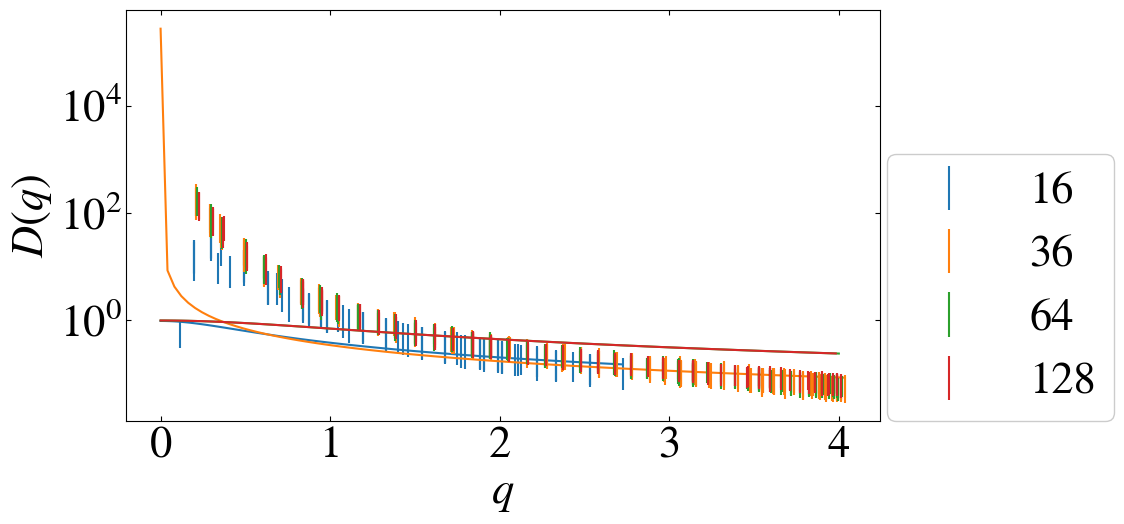

In [12]:
gribov_results = {}


plt.figure(figsize=(12,6))
for pos, Nt in enumerate([16,36,64,128]):
    q = results[Nt]['qi'].copy()
    q = np.asarray([np.linalg.norm(q_*np.asarray([1/XI_R,1,1,1])) for q_ in q])[1:]
    D = results[Nt]['D'].copy()[1:]
    
    D = D[q>0.1]
    q = q[q>0.1]
    
    mu = q[renorm_mu]
    
    Z = 1/(D[renorm_mu]*mu**2)
    
    D *= Z
    fit_cut = q < 4
    print(q[fit_cut])
    
    y = np.asarray([d.mean for d in D])
    y_err = np.asarray([d.sdev for d in D])
    
    print(Nt,Z)
    plt.errorbar(q+0.01*pos,y,y_err,label=Nt,ls='')
    
    plot_q = np.linspace(0,max(q),100)    
    
    try:
        iso_popt,iso_pcov = so.curve_fit(iso_gribov,q[fit_cut],y[fit_cut],sigma=y_err[fit_cut],absolute_sigma=True)
        plt.plot(plot_q,iso_gribov(plot_q,*iso_popt),c=f"C{pos}")
        gv_iso_popt = gv.gvar(iso_popt,np.sqrt(np.diag(iso_pcov)))

    except Exception as e:
        print("Could not fit iso_gribov propagator: ",e)
    try:
        #aniso_popt,aniso_pcov =  so.curve_fit(aniso_gribov,q[fit_cut],y[fit_cut],sigma=y_err[fit_cut],absolute_sigma=True)
        #plt.plot(plot_q,aniso_gribov(plot_q,*aniso_popt))
        #gv_aniso_popt = gv.gvar(aniso_popt,np.sqrt(np.diag(aniso_pcov)))
        pass
    except Exception as e:
        print("Could not fit aniso_gribov propagator: ",e)
    
    gribov_results[Nt] = {'iso_popt':gv_iso_popt,
                          #'aniso_popt':gv_aniso_popt
                         }
    
ax = plt.gca()
#ax.axvline(mu,0,1,ls=':',c='k')
    
plt.legend(loc=(1.01,0))
plt.ylabel('$D(q)$')
plt.xlabel('$q$')
plt.yscale('log')

In [13]:
for Nt in gribov_results.keys():
    iso_popt = gribov_results[Nt]['iso_popt']
    aniso_popt = gribov_results[Nt]['aniso_popt']
    print(iso_popt,aniso_popt)
    plt.errorbar(Nt,abs(iso_popt[0].mean), iso_popt[0].sdev,c='k')
    #plt.errorbar(Nt,aniso_popt[0].mean, aniso_popt[0].sdev,c='r')

KeyError: 'aniso_popt'

In [ ]:

plt.figure(figsize=(12,6))
for pos,Nt in enumerate(results.keys()):

    
    q = results[Nt]['q'].copy()
    q = np.asarray([np.linalg.norm(q_) for q_ in q])
    q_128 = results[128]['q'].copy()
    q_128 = np.asarray([np.linalg.norm(q_) for q_ in q_128])
    
    
    D = results[Nt]['D'].copy()
    D_128 = results[128]['D'].copy()
    
    mu = q[renorm_mu]
    
    Z = 1/(D[renorm_mu]*mu**2)
    Z_128 = 1/(D_128[renorm_mu]*mu**2)
    
    D *= Z
    D_128 *= Z_128
    
    #Bin data
    
    bins = np.arange(0,15,0.5)
    
    x_binned, y_binned = bin_data(q,D,bins)
    x_128_binned, y_128_binned = bin_data(q_128,D_128,bins)
    
    cut = min(len(x_binned),len(x_128_binned))
    
    R_128 = y_binned[:cut]/y_128_binned[:cut]
    
    plt.plot(x_binned[:cut]+0.01*pos,[r_.mean for r_ in R_128],label=36/Nt)
    
ax = plt.gca()
#ax.axvline(mu,0,1,ls=':',c='k')
ax.axhline(1/(2*mu),0,1,c='k',alpha=0.3)
    
plt.legend(loc=(1.01,0))
plt.ylabel('$D(|p|)$')
plt.xlabel('$|p|$')

In [ ]:
q